In [6]:
dirPath='http://inside-dev1.nkn.uidaho.edu:8080/thredds/dodsC/' 
day=1
lat_target=45.0
lon_target=-117.0

In [7]:
import matplotlib
%matplotlib nbagg

from netCDF4 import Dataset

fileName='agg_met_pr_1979_2015_WUSA.nc?lon[0:100:1385],lat[0:100:584],daily_accumulated_precipitation[0:1:0][0:1:0][0:1:0],day[0:1:13020]'

fullfilename= dirPath+fileName
print fullfilename


http://inside-dev1.nkn.uidaho.edu:8080/thredds/dodsC/agg_met_pr_1979_2015_WUSA.nc?lon[0:100:1385],lat[0:100:584],daily_accumulated_precipitation[0:1:0][0:1:0][0:1:0],day[0:1:13020]


In [8]:
filehandle=Dataset(fullfilename,'r',format="NETCDF4")
lathandle=filehandle.variables['lat']
lonhandle=filehandle.variables['lon']
timehandle=filehandle.variables['day']
datahandle=filehandle.variables['daily_accumulated_precipitation']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

#get data
time_num=len(timehandle)
timeindex=range(day-1,time_num, 1)  #python starts arrays at 0
time=timehandle[timeindex]
lat = lathandle[:]
lon = lonhandle[:]
#find indices of target lat/lon/day
lat_index =  np.searchsorted(lat,lat_target,side='left')
lon_index =  np.searchsorted(lon,lon_target,side='left')
#check final is in right bounds
#if(lat[lat_index]>lat_target):
#	if(lat_index!=0):
lat_index = lat_index - 1
#if(lat[lat_index]<lat_target):
#	if(lat_index!=len(lat)):
#		lat_index =lat_index +1
#if(lon[lon_index]>lon_target):
#	if(lon_index!=0):
lon_index = lon_index - 1
#if(lon[lon_index]<lon_target):
#	if(lon_index!=len(lon)):
#		lon_index = lon_index + 1
lat=lat[lat_index]
lon=lon[lon_index]
#get data
data1 = datahandle[timeindex,lat_index,lon_index]

<IPython.core.display.Javascript object>


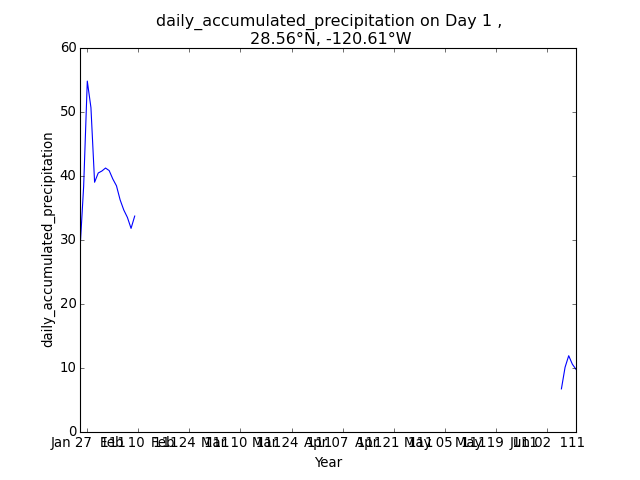

ValueError: x and y must have same first dimension

In [10]:
yearref=1979
years = np.arange(1,time_num,1)
#years = np.arange(yearref,yearref+len(time))
fig = plt.figure()
#plt.plot(data)
ax = fig.add_subplot(111)
ax.set_xlabel(u'Year')
ax.set_ylabel(u'daily_accumulated_precipitation')
ax.set_title(u'daily_accumulated_precipitation on Day %d ,\n %4.2f\u00b0N, -%4.2f\u00b0W' % (day,lat, abs(lon)))
ax.plot_date(x=time,y=data1,fmt="b-")
#ax.ticklabel_format(style='plain')
ax.plot(years,data1,'b-')
plt.savefig("netcdf-opendap-1-graph.png")
plt.show()